# Assignment 3: Methods and Plan

In [1]:
library(tidyverse)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Data Description:

This dataset is focused on the salaries of jobs in the Data Science field, it contains 607 observations with 12 variables. All the variables with explanations are shown below. And before delving into the dataset specifics, it's essential to understand the role of a Data Scientist. 

A Data Scientist is an analytical data expert who uses data to illustrate and explain the phenomena around them, analyze the initial problems that need to be solved, and assist organizations in making better decisions. They have different positions, and they work for companies of all kinds and sizes. Some are multi-national companies that might have thousands of employees worldwide, while there can also be small companies that have about ten to a hundred workers.

The dataset was collected from a salary information online website, ai-jobs.net, which contains a solid amount of companies' information on salaries with different job titles in domains like AI, ML, Data Science, and Big Data.

**Dataset Variables Information:**
- Work Year - The year the salary was paid.
- Experience Level - The experience level in the job with the following values: EN Entry-level, Junior MI Mid-level, Intermediate SE Senior-level, Expert EX Executive-level, Director.
- Employment Type - The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance.
- Job Title - The role worked in during the year.
- Salary - The total gross salary amount paid.
- Salary Currency - The currency of the salary paid as an ISO 4217 currency code.
- Salary In USD - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- Employee Residence - Employee's primary country of residence in during the work year as an ISO 3166 country code.
- Remote Ratio - The overall amount of work done remotely with the following values: 0 No remote work (less than 20%), 50 Partially remote, 100 Fully remote (more than 80%).
- Company Location - The country of the employer's main office or contracting branch as an ISO 3166 country code.
- Company Size - The average number of people that worked for the company during the year: S less than 50 employees (small), M 50 to 250 employees (medium), L more than 250 employees (large).
<br>


## Question:

I am interested in determining the factors that best predict a data scientist's salary based on the given information. Therefore, I will choose Salary In USD be my variable of interest (the response), and the rest of the variables being the explanatory variables to find out what factors have a strong correlation with salary. <br> And my question for research will be **"What are the variables that best predict one's salary?"** and it will be focused on prediction.

## 1. Read dataset from the web into R:

In [2]:
# Specifying column names for each column in the dataset
columns = c("index", "work_year", "experience_level", "employment_type", "job_title", "salary", "salary_currency",
                                    "salary_in_usd", "employee_residence", "remote_ratio", "company_location", "company_size")
# Read dataset from web
ds_salary <- read_csv("https://raw.githubusercontent.com/heydevin/301-Project/main/ds_salaries.csv", 
                        show_col_types = FALSE,
                        skip = 1,
                        col_names = columns)
# Display first 6 rows of dataset
head(ds_salary)

index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


## 2. Clean and wrangle data:

In [3]:
# Checking to see if any of the rows/values in the dataset are NA.
sum(is.na(ds_salary))

[1] 0

- **It's more reasonable to analyze salaries in a single currency, so let's choose only 'salaries_in_USD' as our responese variable and remove the other ones.**
- **The 'index' column is also not relevant to our data analysis. Therefore, let's remove the index, salary_currency, and salary columns.**
- **For better interpretability for each variable, let's rename some of terms in the dataset with the given information from web.**

In [4]:
# Remove 'index', 'salaray_currency', and 'salary' columns.
ds_salary <- ds_salary %>%
    select("work_year", "experience_level", "employment_type", "job_title", 
           "salary_in_usd", "employee_residence", "remote_ratio", "company_location", "company_size")

# Replace variable names in 'experience_level' for better interpretability
ds_salary$experience_level <- 
    ifelse(ds_salary$experience_level == 'EN', 'Entry',
    ifelse(ds_salary$experience_level == 'MI', 'Mid',
    ifelse(ds_salary$experience_level == 'SE', 'Senior',
    ifelse(ds_salary$experience_level == 'EX', 'Expert',
           ds_salary$experience_level))))

# Replace variable names in 'employment_type' for better interpretability
ds_salary$employment_type <- 
    ifelse(ds_salary$employment_type == 'PT', 'Part-time',
    ifelse(ds_salary$employment_type == 'FT', 'Full-time',
    ifelse(ds_salary$employment_type == 'CT', 'Contract',
    ifelse(ds_salary$employment_type == 'FL', 'Freelance',
           ds_salary$employment_type))))

# Replace variable names in 'remote_ratio' for better interpretability
ds_salary$remote_ratio <- 
    ifelse(ds_salary$remote_ratio == '0', 'On-site',
    ifelse(ds_salary$remote_ratio == '50', 'Hybrid',
    ifelse(ds_salary$remote_ratio == '100', 'Remote',
           ds_salary$remote_ratio)))

# Replace variable names in 'company_size' for better interpretability
ds_salary$company_size <- 
    ifelse(ds_salary$company_size == 'S', 'Small',
    ifelse(ds_salary$company_size == 'M', 'Medium',
    ifelse(ds_salary$company_size == 'L', 'Large',
           ds_salary$company_size)))

# Display first 6 rows of dataset
head(ds_salary)

work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
2020,Mid,Full-time,Data Scientist,79833,DE,On-site,DE,Large
2020,Senior,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small
2020,Senior,Full-time,Big Data Engineer,109024,GB,Hybrid,GB,Medium
2020,Mid,Full-time,Product Data Analyst,20000,HN,On-site,HN,Small
2020,Senior,Full-time,Machine Learning Engineer,150000,US,Hybrid,US,Large
2020,Entry,Full-time,Data Analyst,72000,US,Remote,US,Large


## 3. Visualization and explaination:

- **My question was "What are the variables that best predict one's salary?"**
- **Given that a majority of the variables are categorical, I propose making box plots for each variable to explore their relationships with the salary.**


In [5]:
# Making boxplot for salary by work_year
work_year_boxplot <- ggplot(ds_salary, aes(x = as.factor(work_year), y = salary_in_usd, color = as.factor(work_year))) +
    geom_boxplot(show.legend = FALSE, alpha = 1) +
    xlab('Work Year') +
    ylab('Salary In USD') +
    ggtitle("Salaries by Work Year") +
    coord_cartesian(ylim = c(0,300000)) + 
    theme(axis.text.x = element_text(size = 12),
          axis.text.y = element_text(size = 12),
          title = element_text(size = 20),
          axis.title.x = element_text(size = 20),
          axis.title.y = element_text(size = 20),
          plot.title = element_text(hjust = 0.5))

# Making boxplot for salary by remote_ratio
remote_ratio_boxplot <- ggplot(ds_salary, aes(x = remote_ratio, y = salary_in_usd, color = remote_ratio)) +
    geom_boxplot(show.legend = FALSE, alpha = 1) +
    xlab('Remote Ratio') +
    ylab('Salary In USD') +
    ggtitle("Salaries by Remote Ratio") +
    coord_cartesian(ylim = c(0,300000)) + 
    theme(axis.text.x = element_text(size = 12),
          axis.text.y = element_text(size = 12),
          title = element_text(size = 20),
          axis.title.x = element_text(size = 20),
          axis.title.y = element_text(size = 20),
          plot.title = element_text(hjust = 0.5))

# Making boxplot for salary by experience_level
experience_level_boxplot <- ggplot(ds_salary, aes(x = experience_level, y = salary_in_usd, color = experience_level)) +
    geom_boxplot(show.legend = FALSE, alpha = 1) +
    xlab('Experience Level') +
    ylab('Salary In USD') +
    ggtitle("Salaries by Experience Level") +
    coord_cartesian(ylim = c(0,350000)) + 
    theme(axis.text.x = element_text(size = 12),
          axis.text.y = element_text(size = 12),
          title = element_text(size = 20),
          axis.title.x = element_text(size = 20),
          axis.title.y = element_text(size = 20),
          plot.title = element_text(hjust = 0.5))

# Making boxplot for salary by employment_type
employment_type_boxplot <- ggplot(ds_salary, aes(x = employment_type, y = salary_in_usd, color = employment_type)) +
    geom_boxplot(show.legend = FALSE, alpha = 1) +
    xlab('Employment Type') +
    ylab('Salary In USD') +
    ggtitle("Salaries by Employment Type") +
    coord_cartesian(ylim = c(0,350000)) + 
    theme(axis.text.x = element_text(size = 12),
          axis.text.y = element_text(size = 12),
          title = element_text(size = 20),
          axis.title.x = element_text(size = 20),
          axis.title.y = element_text(size = 20),
          plot.title = element_text(hjust = 0.5))

# Making boxplot for salary by company_size
company_size_boxplot <- ggplot(ds_salary, aes(x = company_size, y = salary_in_usd, color = company_size)) +
    geom_boxplot(show.legend = FALSE, alpha = 1) +
    xlab('Company Size') +
    ylab('Salary In USD') +
    ggtitle("Salaries by Company Size") +
    coord_cartesian(ylim = c(0,350000)) + 
    theme(axis.text.x = element_text(size = 12),
          axis.text.y = element_text(size = 12),
          title = element_text(size = 20),
          axis.title.x = element_text(size = 20),
          axis.title.y = element_text(size = 20),
          plot.title = element_text(hjust = 0.5))

# Making boxplot for salary by job_title
job_title_boxplot <- ggplot(ds_salary, aes(x = job_title, y = salary_in_usd, color = job_title)) +
    geom_boxplot(show.legend = FALSE, alpha = 1) +
    xlab('Job Title') +
    ylab('Salary In USD') +
    ggtitle("Salaries by Job Title") +
    coord_cartesian(ylim = c(0,400000)) +
    theme(axis.text.x = element_text(size = 12, angle = 30, hjust = 1),
          axis.text.y = element_text(size = 12, angle = 30, hjust = 1),
          title = element_text(size = 25),
          axis.title.x = element_text(size = 25),
          axis.title.y = element_text(size = 25),
          plot.title = element_text(hjust = 0.5))

# Making boxplot for salary by employee_residence
employee_residence_boxplot <- ggplot(ds_salary, aes(x = employee_residence, y = salary_in_usd, color = employee_residence)) +
    geom_boxplot(show.legend = FALSE, alpha = 1) +
    xlab('Employee Residence') +
    ylab('Salary In USD') +
    ggtitle("Salaries by Employee Residence") +
    coord_cartesian(ylim = c(0,220000)) +
    theme(axis.text.x = element_text(size = 12, angle = 30, hjust = 1),
          axis.text.y = element_text(size = 12, angle = 30, hjust = 1),
          title = element_text(size = 25),
          axis.title.x = element_text(size = 25),
          axis.title.y = element_text(size = 25),
          plot.title = element_text(hjust = 0.5))

# Making boxplot for salary by company_location
company_location_boxplot <- ggplot(ds_salary, aes(x = company_location, y = salary_in_usd, color = company_location)) +
    geom_boxplot(show.legend = FALSE, alpha = 1) +
    xlab('Company Location') +
    ylab('Salary In USD') +
    ggtitle("Salaries by Company Location") +
    coord_cartesian(ylim = c(0,220000)) +
    theme(axis.text.x = element_text(size = 12, angle = 30, hjust = 1),
          axis.text.y = element_text(size = 12, angle = 30, hjust = 1),
          title = element_text(size = 25),
          axis.title.x = element_text(size = 25),
          axis.title.y = element_text(size = 25),
          plot.title = element_text(hjust = 0.5))

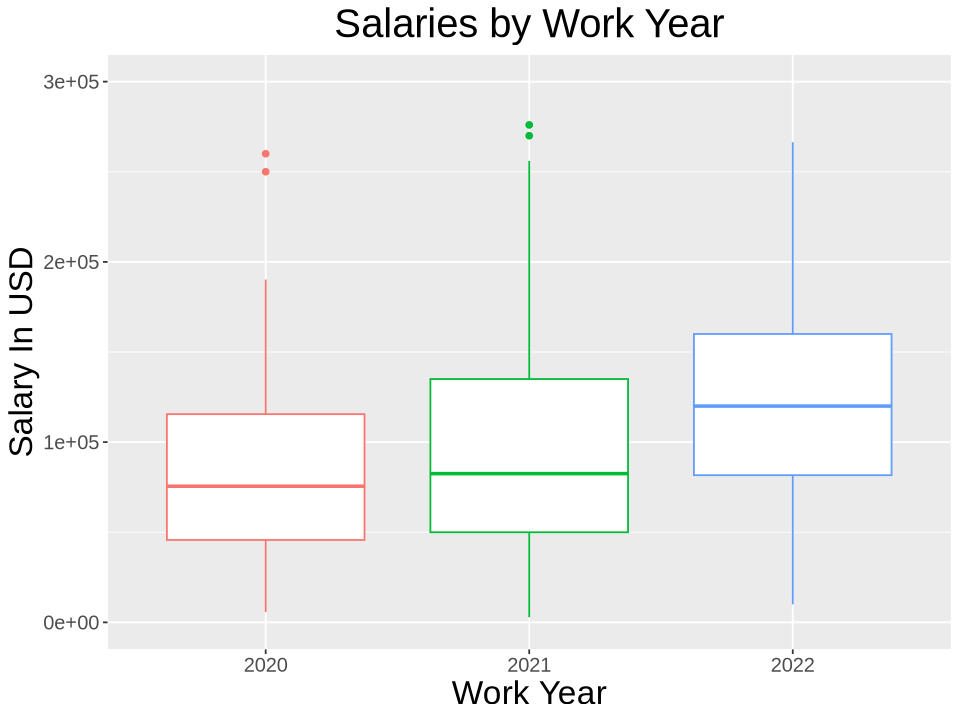

In [6]:
# Set appropriate plot size
options(repr.plot.width = 8, repr.plot.height = 6)
# Display the plot
work_year_boxplot

 - We can clearly see that salaries significantly increased in **2022** compared to the work year of **2021** and **2020**.
##### Therefore, knowing one's specifc work year might have a impact when comes to predicting one's salary. And this also might be indicating that Data science jobs are becoming more important in the world, and that's why salaries are increasing over the years.

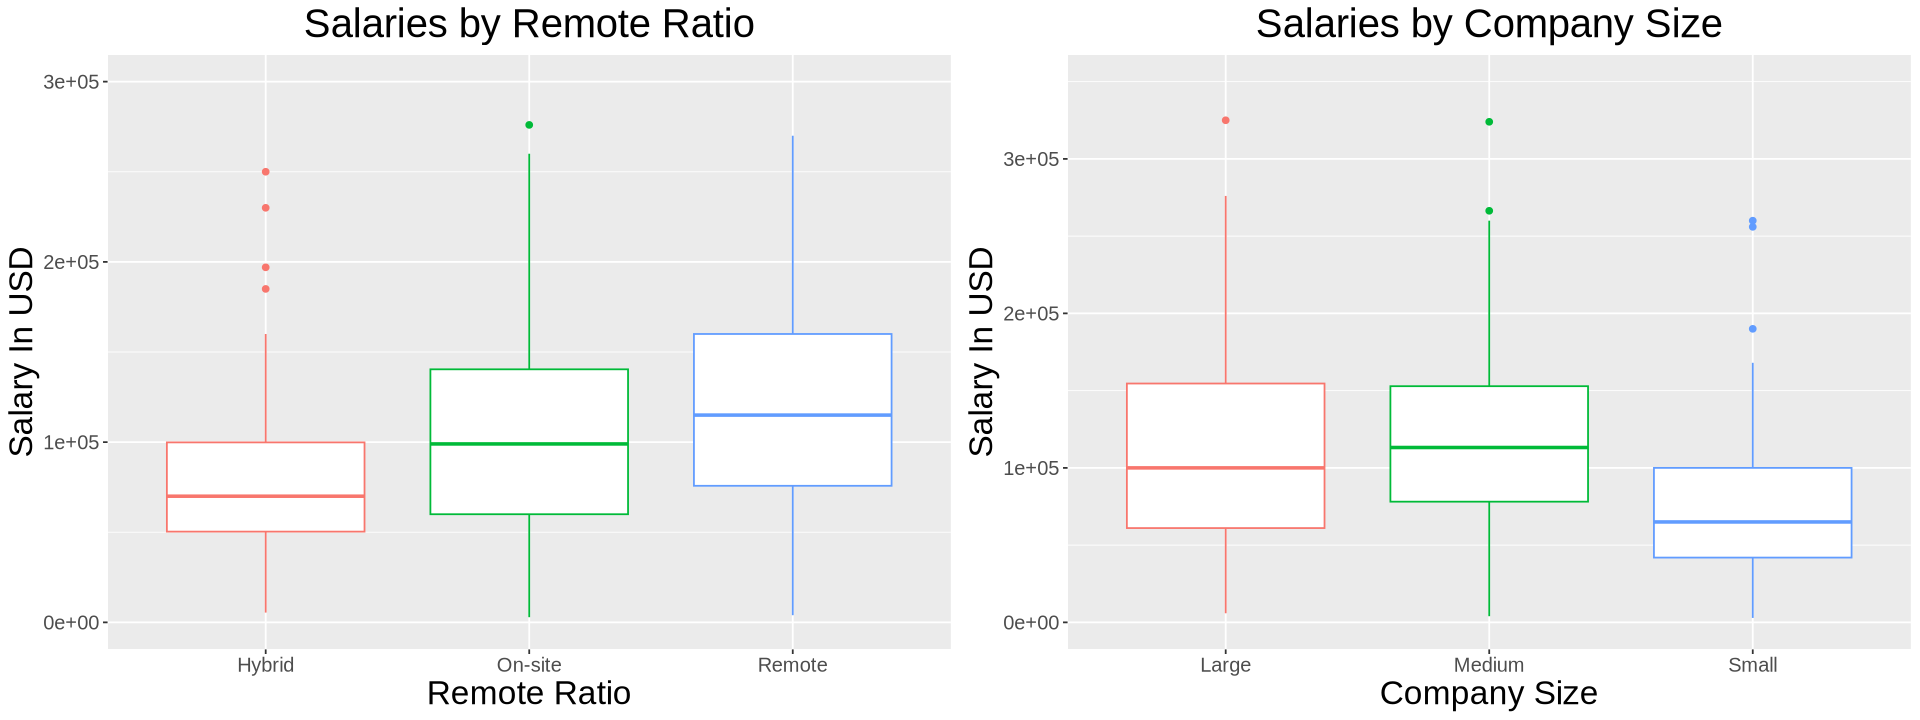

In [7]:
# Set appropriate plot size
options(repr.plot.width = 16, repr.plot.height = 6)
# Display plots and arrange plots together to make a better format for visualization
grid.arrange(remote_ratio_boxplot, company_size_boxplot, ncol=2, widths = c(8,8))

 - **Fully remote** working employee has a higher salary than others, which is surprising.
 - **On-site** working employee also tends to have a higher salary than **hybrid** working employees.
 - **Large** and **medium** size companies have higher salaries than **small** size companies.
##### I think it's possible that this has to do with other factors, such as countries. It might be that the majority of the remote workers are working for US-based companies, which provide high salaries for the remote working employees. And larger size companies might definitely be one of the factors affecting one's salary.

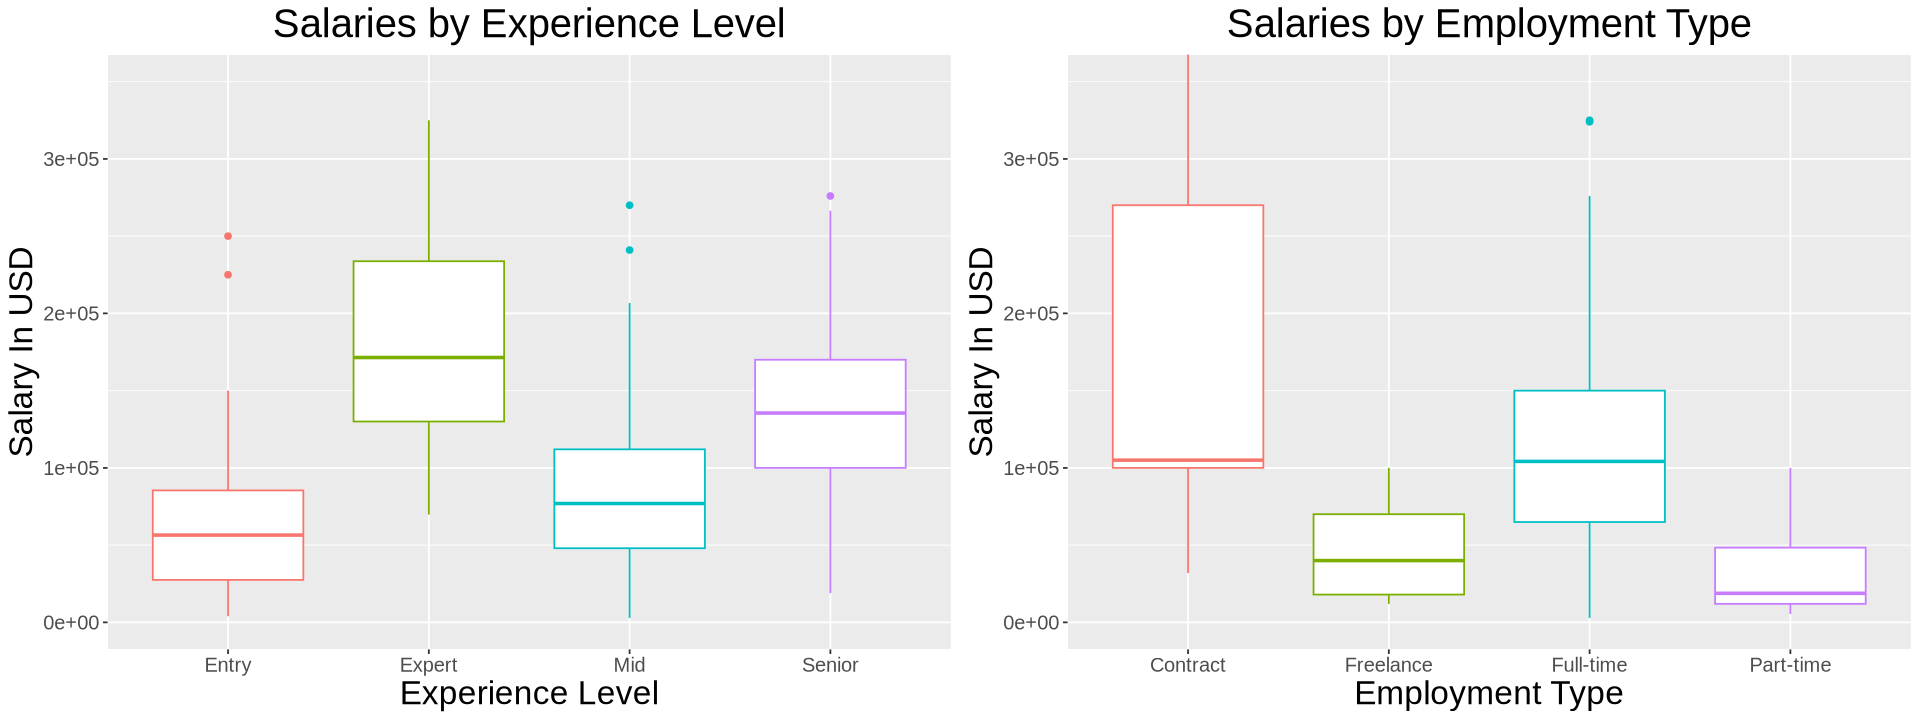

In [8]:
grid.arrange(experience_level_boxplot, employment_type_boxplot, ncol=2, widths = c(8,8))

 - **Salaries** are following the sequence of **Entry level**, **Mid-level**, **Senior level**, and **Expert level**, this indicates that:
 - **Salary** and **Experience level** have a positive correlation, which means employees with more experience get higher salaries.
 - Employees that work with a **Contract** has the highest salary, it has a very wide range and a median similar to **Full-time** employees.
 - **Full-time** employees are getting paid way higher than what **Part-time** and **Freelance** employees are getting.
##### It makes sense that the Salary and Experience level have a positive correlation, therefore we can assume that employees with more experience are more likely to have a higher salary when we predict one's salary. Employees with contract or full-time working employees do have higher salaries. But their salaries have such a wide range, making it difficult to assume that this might be one of the important factors that affect when predicting one's salary.

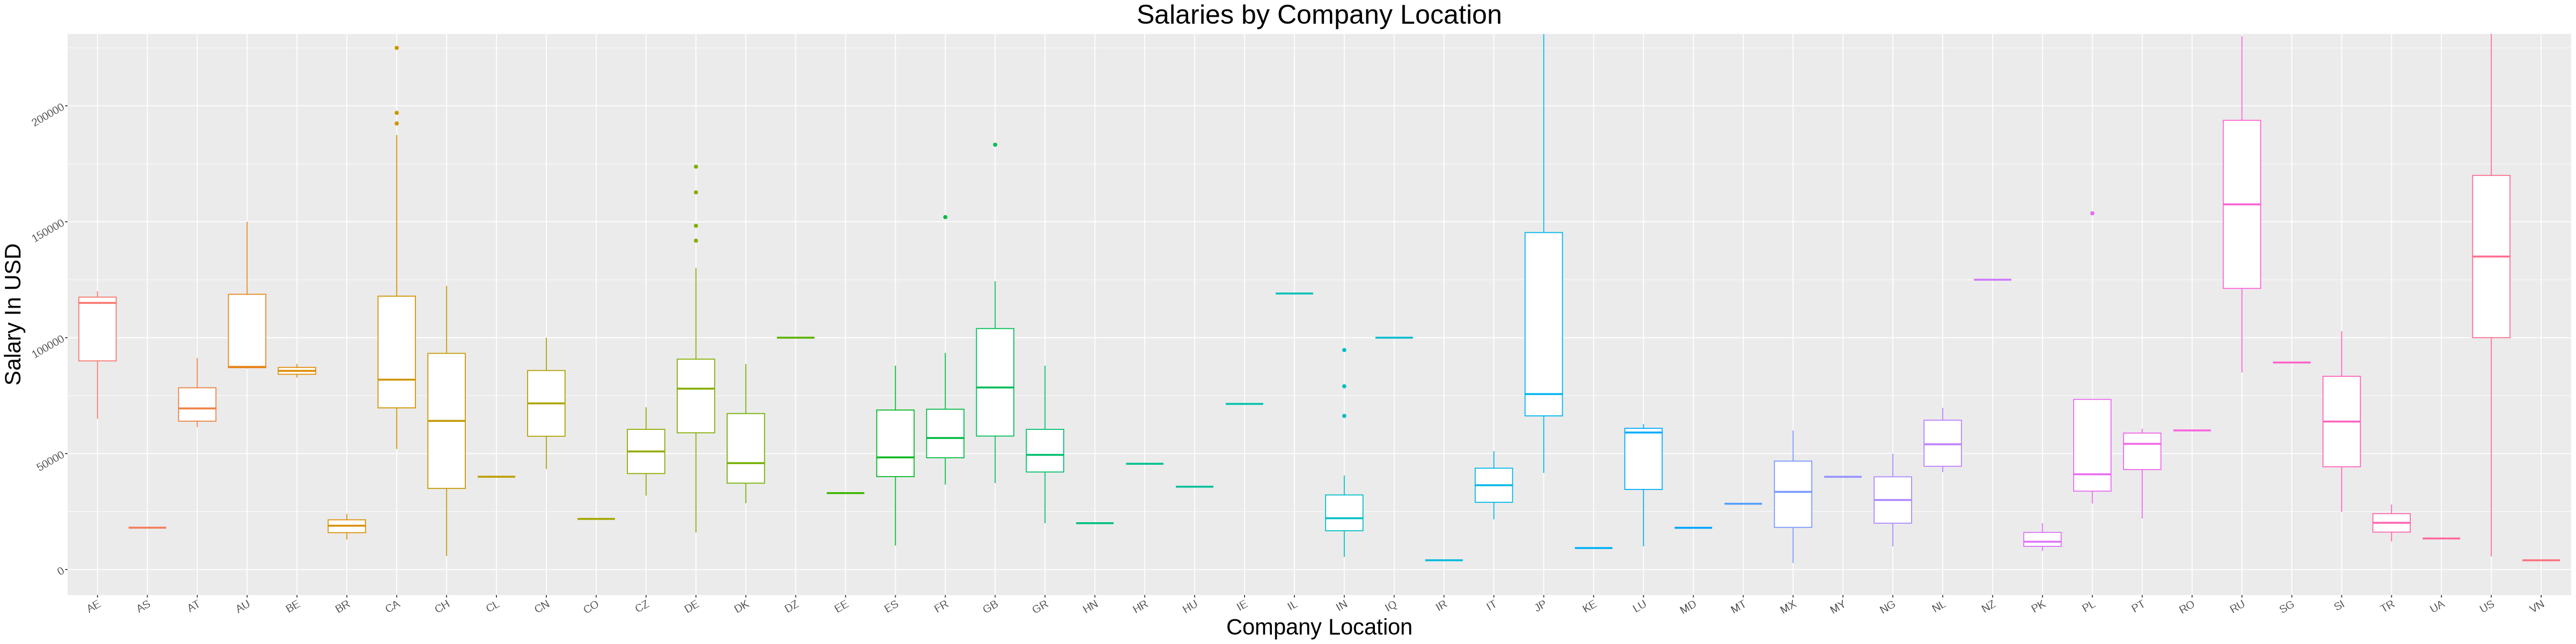

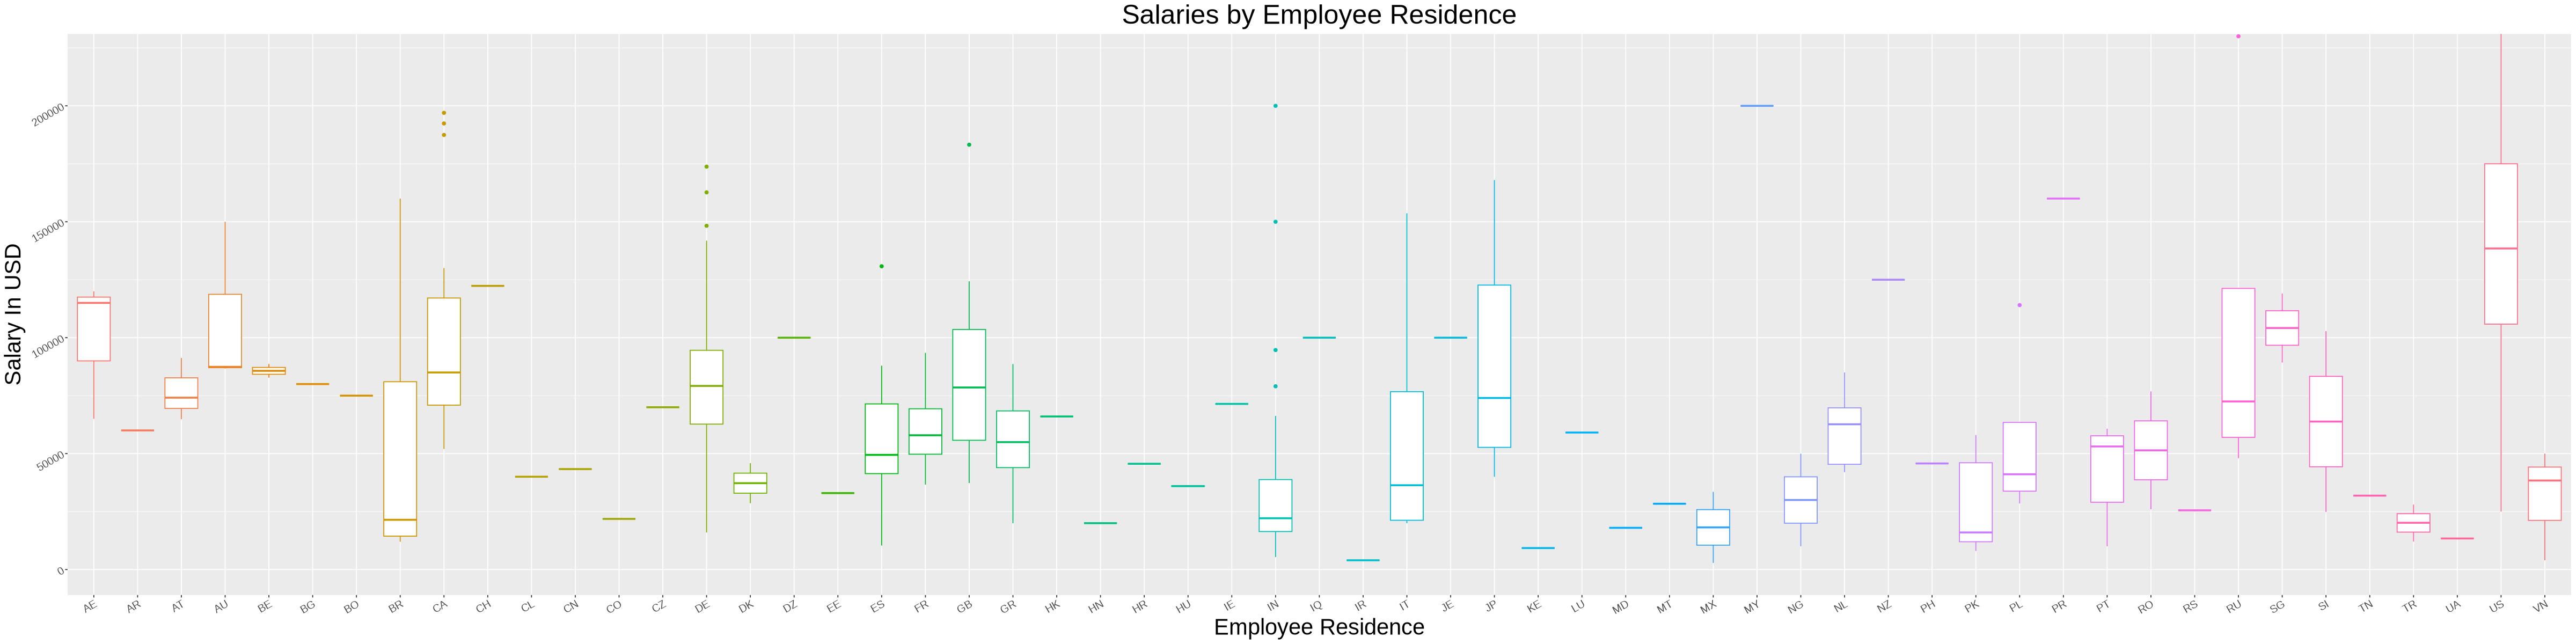

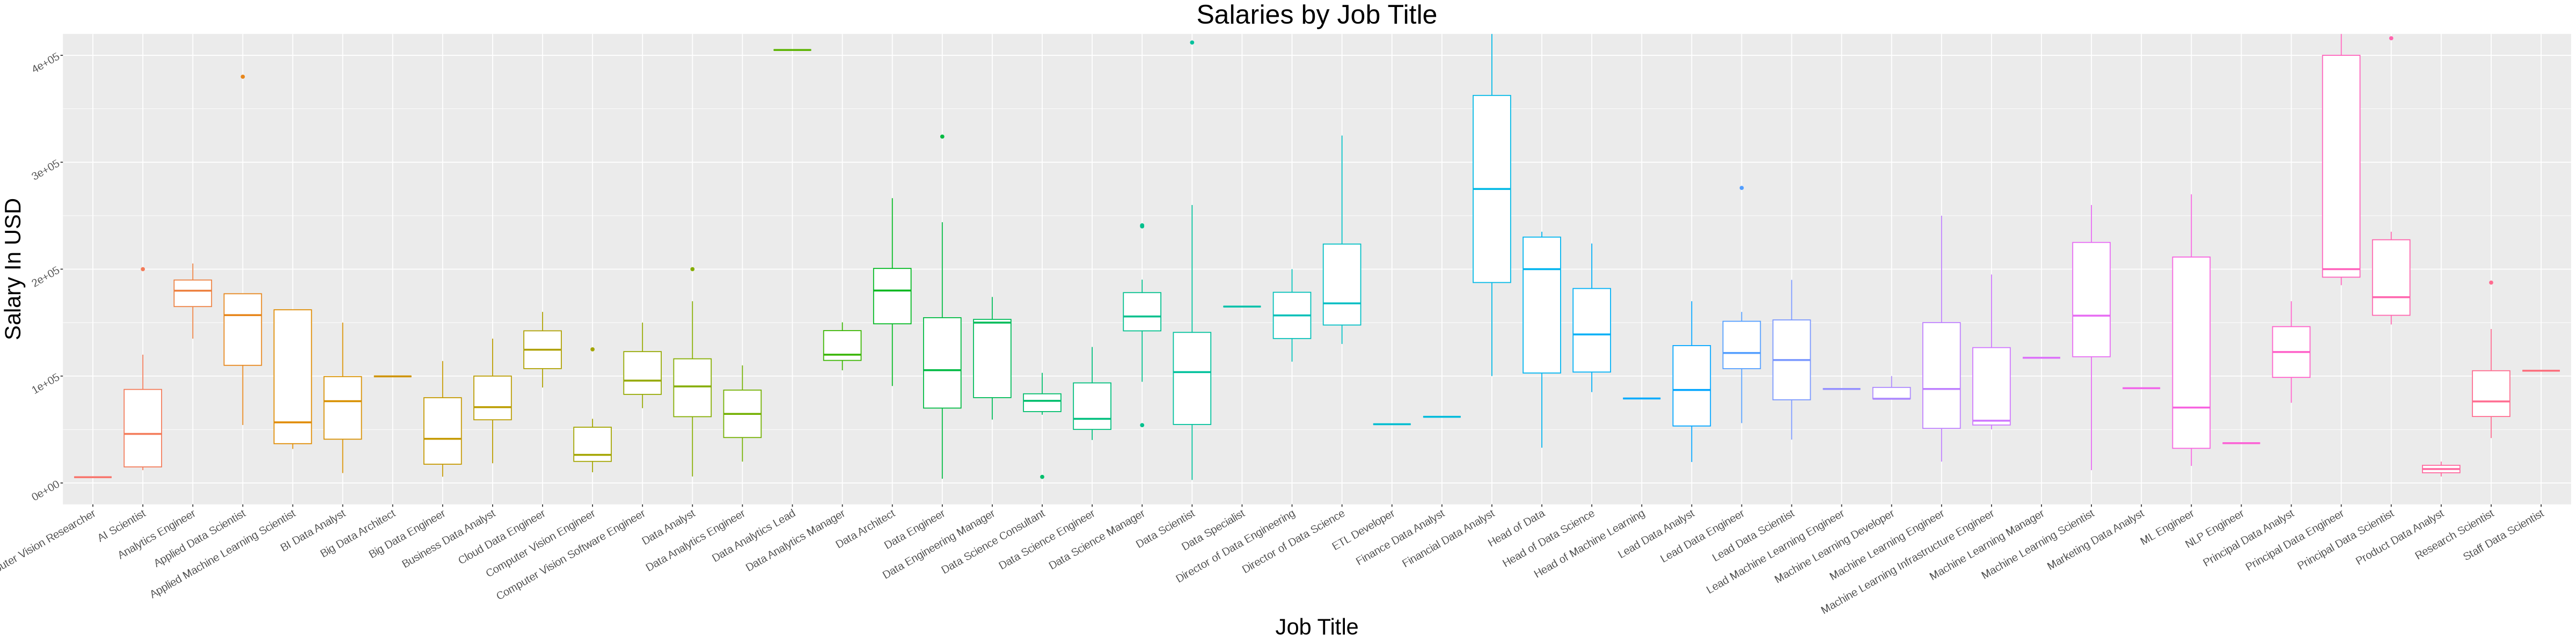

In [9]:
# Set appropriate plot size
options(repr.plot.width = 40, repr.plot.height = 10)
# Display the plot
company_location_boxplot
# Display the plot
employee_residence_boxplot
# Display the plot
job_title_boxplot

- **Salaries** from the US for company location and employee residence are the highest.
- **Principal Data Engineers** and **Financial Data Analysts** are earning the most with over 2.5 million USD.
- There is a **Data Analytics Lead** with over 3 million USD salary, and that is a single entry data, which might not be reliable.
##### I don't think these 3 variables are reliable when comes to predicting one's salary, they cover too much information in each variable, which would lead to wrong assumptions. And there are many single data entries for each variable, with one single value representing the location or job title, making it unfair or biased. Some of the job titles have an extremely high salary, which just does not reflect reality at all. Therefore, I would not consider these variables as important factors when comes to predicting one's salary.

## 4. Methods and Plan:

To proceed with my question, **"What are the variables that best predict one's salary?"**, here is how I plan to approach it:
1. **Data Split Training & Testing Sets:** First let's split our data into two parts, training sets and test sets. I will do **70%** for the **training set** and **30%** for the **testing set**. We will train the model using the training set, and test the model with the testing set to see its performance.
2. **Select Features Plan:** Then I will be using the **forward selection** algorithm on the training set, perform forward predictive modeling to and select our model depending on the model with the best **Mallow's Cp** / **BIC** value, and select the feature variables that are relevant to the response variable, 'Salary In USD'.
3. **Evaluate the Model:** Eventually, we will create a linear model using the selected input variables in an additive model, and then evaluate the performance of the linear model using the testing set. Since we expect to see a strong relationship between the selected feature variables that predict a data scientist's salary, we can judge how good the model is by the test **RMSE** that we obtain from using the function **rmse()** on the testing set and model.

- **Why is this method appropriate?**

This method is appropriate because it follows a systematic approach to building and evaluating a predictive model for salary prediction. Splitting the data into training and testing sets helps to assess the model's generalization performance on unseen data. Using a forward selection algorithm would help us to identify the most relevant features that predict salary, thereby simplifying the model and potentially improving its interpretability. Evaluating the model's performance using the test RMSE provides a quantitative measure of how well the model predicts salary.
- **Which assumptions are required, if any, to apply the method selected?**

Here are some assumptions when we are trying to fit a linear regression model:

We have **Linearty Assumption**, which means the model assumes a linear relationship between the input and response variables. And **Normality of Residuals**, which means the residuals are normally distributed. We also have **Assumption of Independence**, which states that the residuals (the differences between the observed and predicted values) are independent of each other. And **Homoscedasticity**, which means the variance of the residuals is constant across all levels of the predictor variables. The forward selection algorithm also assumes that the addition of each variable improves the model fit.

- **What are potential limitations or weaknesses of the method selected?**

The linear regression model assumes a linear relationship between the predictors and the response, which may not be always true in real-world scenarios. The forward selection algorithm may suffer from overfitting if the number of predictor variables is large relative to the sample size. And it's possible that some of the predictor variables are not good representations or important predictor variables are not included in the dataset, leading to a biased model predictions. And the evaluation of the model using RMSE only provides a single measure of performance and may not capture all aspects of model fit. 